# Exploratory Data Analysis Practice Case
## Data Fellowship IYKRA Batch 5 2021
### Abednego Kristanto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('epl_1819.csv')
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


In [3]:
df.shape

(20, 44)

### 1. Whether this data is clean?

Check missing value:

In [4]:
df.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

There are no missing values in the dataset.

Check the data types:

In [5]:
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [6]:
df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].head()

,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
0,"26,581","1,814","4,240",543
1,"23,638","2,250","3,416",639
2,"25,070","1,774","3,874",593
3,"21,295","2,267","3,191",770
4,"20,805","2,062","3,102",762


#### Answer:
The data is not clean because there are still columns with wrong data types. To clean the dataset, commas in these columns will be removed and its values is converted into 'int64'.

In [7]:
strs = ['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']
for s in strs:
    df[[s]] = df[s].str.replace(',','').astype('int64')

print(df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].dtypes)
df[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].head()

attack_passes         int64
attack_passes_long    int64
attack_passes_back    int64
defence_clearances    int64
dtype: object


,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
0,26581,1814,4240,543
1,23638,2250,3416,639
2,25070,1774,3874,593
3,21295,2267,3191,770
4,20805,2062,3102,762


### 2. How is the point distribution of the epl team? and which team is an anomaly?

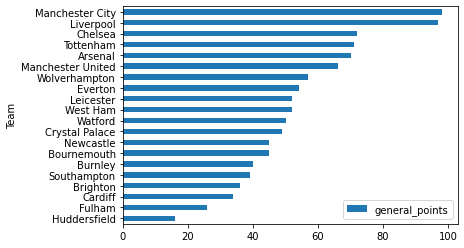

In [8]:
df.plot.barh(x='Team',y='general_points').invert_yaxis()

#### Answer:
Manchester City and Liverpool are anomalies here because their points are leaving other teams behind by very high margin (more than 20 points from nearest position, Chelsea).

### 3. Which team has the best attack?
Features to determine which team has the best attack are: 'attack_scored', 'attack_shots_on_target', 'attack_posession', and 'attack_pass_accuracy' with weighting as follows:

| Feature | Weight |
| --- | --- |
|'attack_scored'|45|
|'attack_shots_on_target'|35|
|'attack_pass_accuracy'|10|
|'attack_posession'|10|
|Total|100|

In [9]:
df_att = df[['Team', 'attack_scored', 'attack_shots_on_target', 'attack_posession','attack_pass_accuracy']]
df_att.head()

,Team,attack_scored,attack_shots_on_target,attack_posession,attack_pass_accuracy
0,Manchester City,95,260,64.0,89.0
1,Liverpool,89,226,58.8,84.4
2,Chelsea,63,198,59.9,87.6
3,Tottenham,67,189,56.7,83.2
4,Arsenal,73,170,56.1,83.3


Normalize values using sklearn MinMaxScaler to calculate Attack rating for each team:

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_att[['attack_scored', 'attack_shots_on_target', 'attack_posession','attack_pass_accuracy']] = \
    scaler.fit_transform(df_att[['attack_scored', 'attack_shots_on_target', 'attack_posession','attack_pass_accuracy']])
df_att['Total_Rating'] = df_att['attack_scored']*45 + df_att['attack_shots_on_target']*35 + \
    df_att['attack_posession']*10 + df_att['attack_pass_accuracy']*10

df_att.sort_values(by='Total_Rating', ascending=False).head()

C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\ABEDN

,Team,attack_scored,attack_shots_on_target,attack_posession,attack_pass_accuracy,Total_Rating
0,Manchester City,1.000000,1.000000,1.000000,1.000000,100.000000
1,Liverpool,0.917808,0.776316,0.791165,0.816733,84.551400
5,Manchester United,0.589041,0.769737,0.570281,0.733068,66.481127
2,Chelsea,0.561644,0.592105,0.835341,0.944223,63.793302
3,Tottenham,0.616438,0.532895,0.706827,0.768924,61.148558


#### Answer:
Manchester City is without doubt the team that has the best attacking performance in English Premier League Season 2018/2019, leaving behind its competitors with high margin. Surprisingly, Manchester United that finished in 6th place that season was actually in 3rd place of the total rating above.

### 4. Which team has the best defence?
Features to determine which team has the best defense are: -('defence_goals_conceeded'), 'defence_saves', 'defence_blocks', 'defence_interceptions', and 'defence_tackles'. Feature 'defence_goals_conceeded' is given minus because the more team conceeded, the worse the defence performance. The features weight for defence rating are as follows: 

| Feature | Weight |
| --- | --- |
|-('defence_goals_conceeded')|60|
|'defence_saves'|10|
|'defence_blocks'|10|
|'defence_interceptions'|10|
|'defence_tackles'|10|
|Total|100|

In [11]:
df_def = df[['Team', 'defence_saves', 'defence_blocks', 'defence_interceptions','defence_tackles']]
df_def['-(defence_goals_conceeded)'] = - df[['defence_goals_conceeded']]
df_def.head()

C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,defence_saves,defence_blocks,defence_interceptions,defence_tackles,-(defence_goals_conceeded)
0,Manchester City,58,63,362,518,-23
1,Liverpool,76,78,314,610,-22
2,Chelsea,85,73,351,618,-39
3,Tottenham,121,112,326,626,-39
4,Arsenal,133,118,412,609,-51


In [12]:
df_def[['defence_saves','defence_blocks','defence_interceptions','defence_tackles','-(defence_goals_conceeded)']] = \
    scaler.fit_transform(df_def[['defence_saves','defence_blocks','defence_interceptions','defence_tackles','-(defence_goals_conceeded)']])
df_def['Total_Rating'] = df_def['-(defence_goals_conceeded)']*60 + df_def['defence_saves']*10 + \
    df_def['defence_blocks']*10 + df_def['defence_interceptions']*10 + df_def['defence_tackles']*10

df_def.sort_values(by='Total_Rating', ascending=False).head()

C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ABEDNEGO\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\ABEDNEGO\Anaconda

,Team,defence_saves,defence_blocks,defence_interceptions,defence_tackles,-(defence_goals_conceeded),Total_Rating
1,Liverpool,0.200000,0.094340,0.000000,0.433962,1.000000,67.283019
6,Wolverhampton,0.466667,0.534591,0.799145,0.952830,0.593220,63.125554
0,Manchester City,0.000000,0.000000,0.205128,0.000000,0.983051,61.034333
12,Newcastle,0.411111,0.446541,0.820513,0.924528,0.559322,59.586253
3,Tottenham,0.700000,0.308176,0.051282,0.509434,0.711864,58.400786


#### Answer:
Liverpool has the best defense in the EPL Season 2018/2019, because they conceed goals the least compare to other teams, and the goal conceeded is the primary measure of this defensive performance rating calculation. Manchester City however as the EPL Season 2018/2019 Champion, surprisingly has worse defense performance than Wolverhampton which finished in position 7 that season.

### 5. Which team is good in financial aspect?
Team financial aspect will be reviewed by comparing 'finance \_team\_market' and 'finance \_tv\_revenue' of each team. 

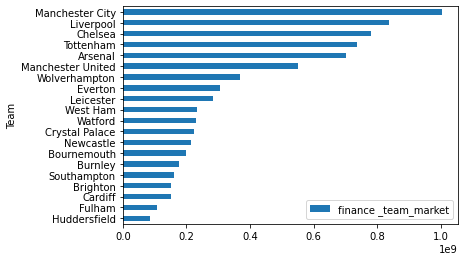

In [13]:
df.plot.barh(x='Team',y='finance _team_market').invert_yaxis()

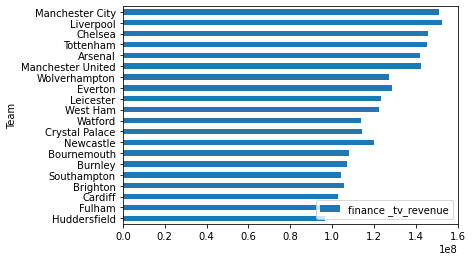

In [14]:
df.plot.barh(x='Team',y='finance _tv_revenue').invert_yaxis()
plt.legend(loc='lower right')

#### Answer:
The TV revenue for 20 teams in EPL is not that much difference from each other, therefore does not affect the financial aspect comparison significantly. However, the market value of each team is reflected into the league result as the team with higher team market is likely to finished on the top of other teams with lower team market. Manchester City has the best financial in EPL Season 2018/2019.